# 분류 모델 실습해보기

- 로지스틱 회귀(Logistic Regression)
- 결정 트리(Decision Tree)
- 랜덤 포레스트(Random Forest)
- 서포트 벡터 머신(SVM, Support Vector Machine)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 데이터셋

- Breast Cancer Wisconsin diagnostic dataset
- `sklearn.datasets` 의 `load_breast_cancer()` 이용

```markdown
## 데이터셋 특성
- 샘플 수: 569개
- 속성 수: 30개의 수치형 예측 속성과 클래스

## 속성 정보
- 반지름 (중심에서 둘레까지 거리의 평균)
- 질감 (회색조 값의 표준편차)
- 둘레
- 면적
- 평활도 (반지름 길이의 국소적 변화)
- 밀집도 (둘레² / 면적 - 1.0)
- 오목성 (윤곽의 오목한 부분의 심각도)
- 오목한 지점 (윤곽의 오목한 부분의 수)
- 대칭성
- 프랙탈 차원 ("해안선 근사값" - 1)

각 이미지에 대해 이러한 특성의 평균, 표준 오차, "최악" 또는 가장 큰 값(가장 큰 3개 값의 평균)이 계산되어 총 30개의 특성이 됩니다.

## 클래스
- WDBC-악성(Malignant)
- WDBC-양성(Benign)

## 클래스 분포
- 악성: 212개
- 양성: 357개

## 데이터 출처
- 제작자: Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian
- 기증자: Nick Street
- 날짜: 1995년 11월

이 데이터셋은 유방 종괴의 미세침흡인(FNA) 디지털 이미지에서 계산된 특성들을 포함합니다. 이 특성들은 이미지에 존재하는 세포핵의 특징을 설명합니다. 결측값은 없으며, UCI ML 저장소에서 제공하는 Wisconsin 유방암 진단 데이터셋의 복사본입니다.
```

In [2]:
from sklearn.datasets import load_breast_cancer


cancer_dataset = load_breast_cancer()

print(cancer_dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
print("데이터셋의 shape:", cancer_dataset["data"].shape)
print("데이터셋의 특성 이름:", cancer_dataset["feature_names"])
print("데이터셋의 target:", cancer_dataset["target"].shape)
print("데이터셋의 target 이름:", cancer_dataset["target_names"])

count_malignant, count_benign = np.bincount(cancer_dataset["target"])
print(f"총 {count_malignant} 개의 악성 샘플과 총 {count_benign} 개의 양성 샘플")

데이터셋의 shape: (569, 30)
데이터셋의 특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
데이터셋의 target: (569,)
데이터셋의 target 이름: ['malignant' 'benign']
총 212 개의 악성 샘플과 총 357 개의 양성 샘플


In [4]:
cancer_df = pd.DataFrame(cancer_dataset["data"], columns=cancer_dataset["feature_names"])
cancer_df.loc[:, "target"] = cancer_dataset["target"]
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### target 별로 히스토그램 그려보기

- 두 class 에 대한 히스토그램이 잘 나뉠 수록 사용할 만한 feature 인 것

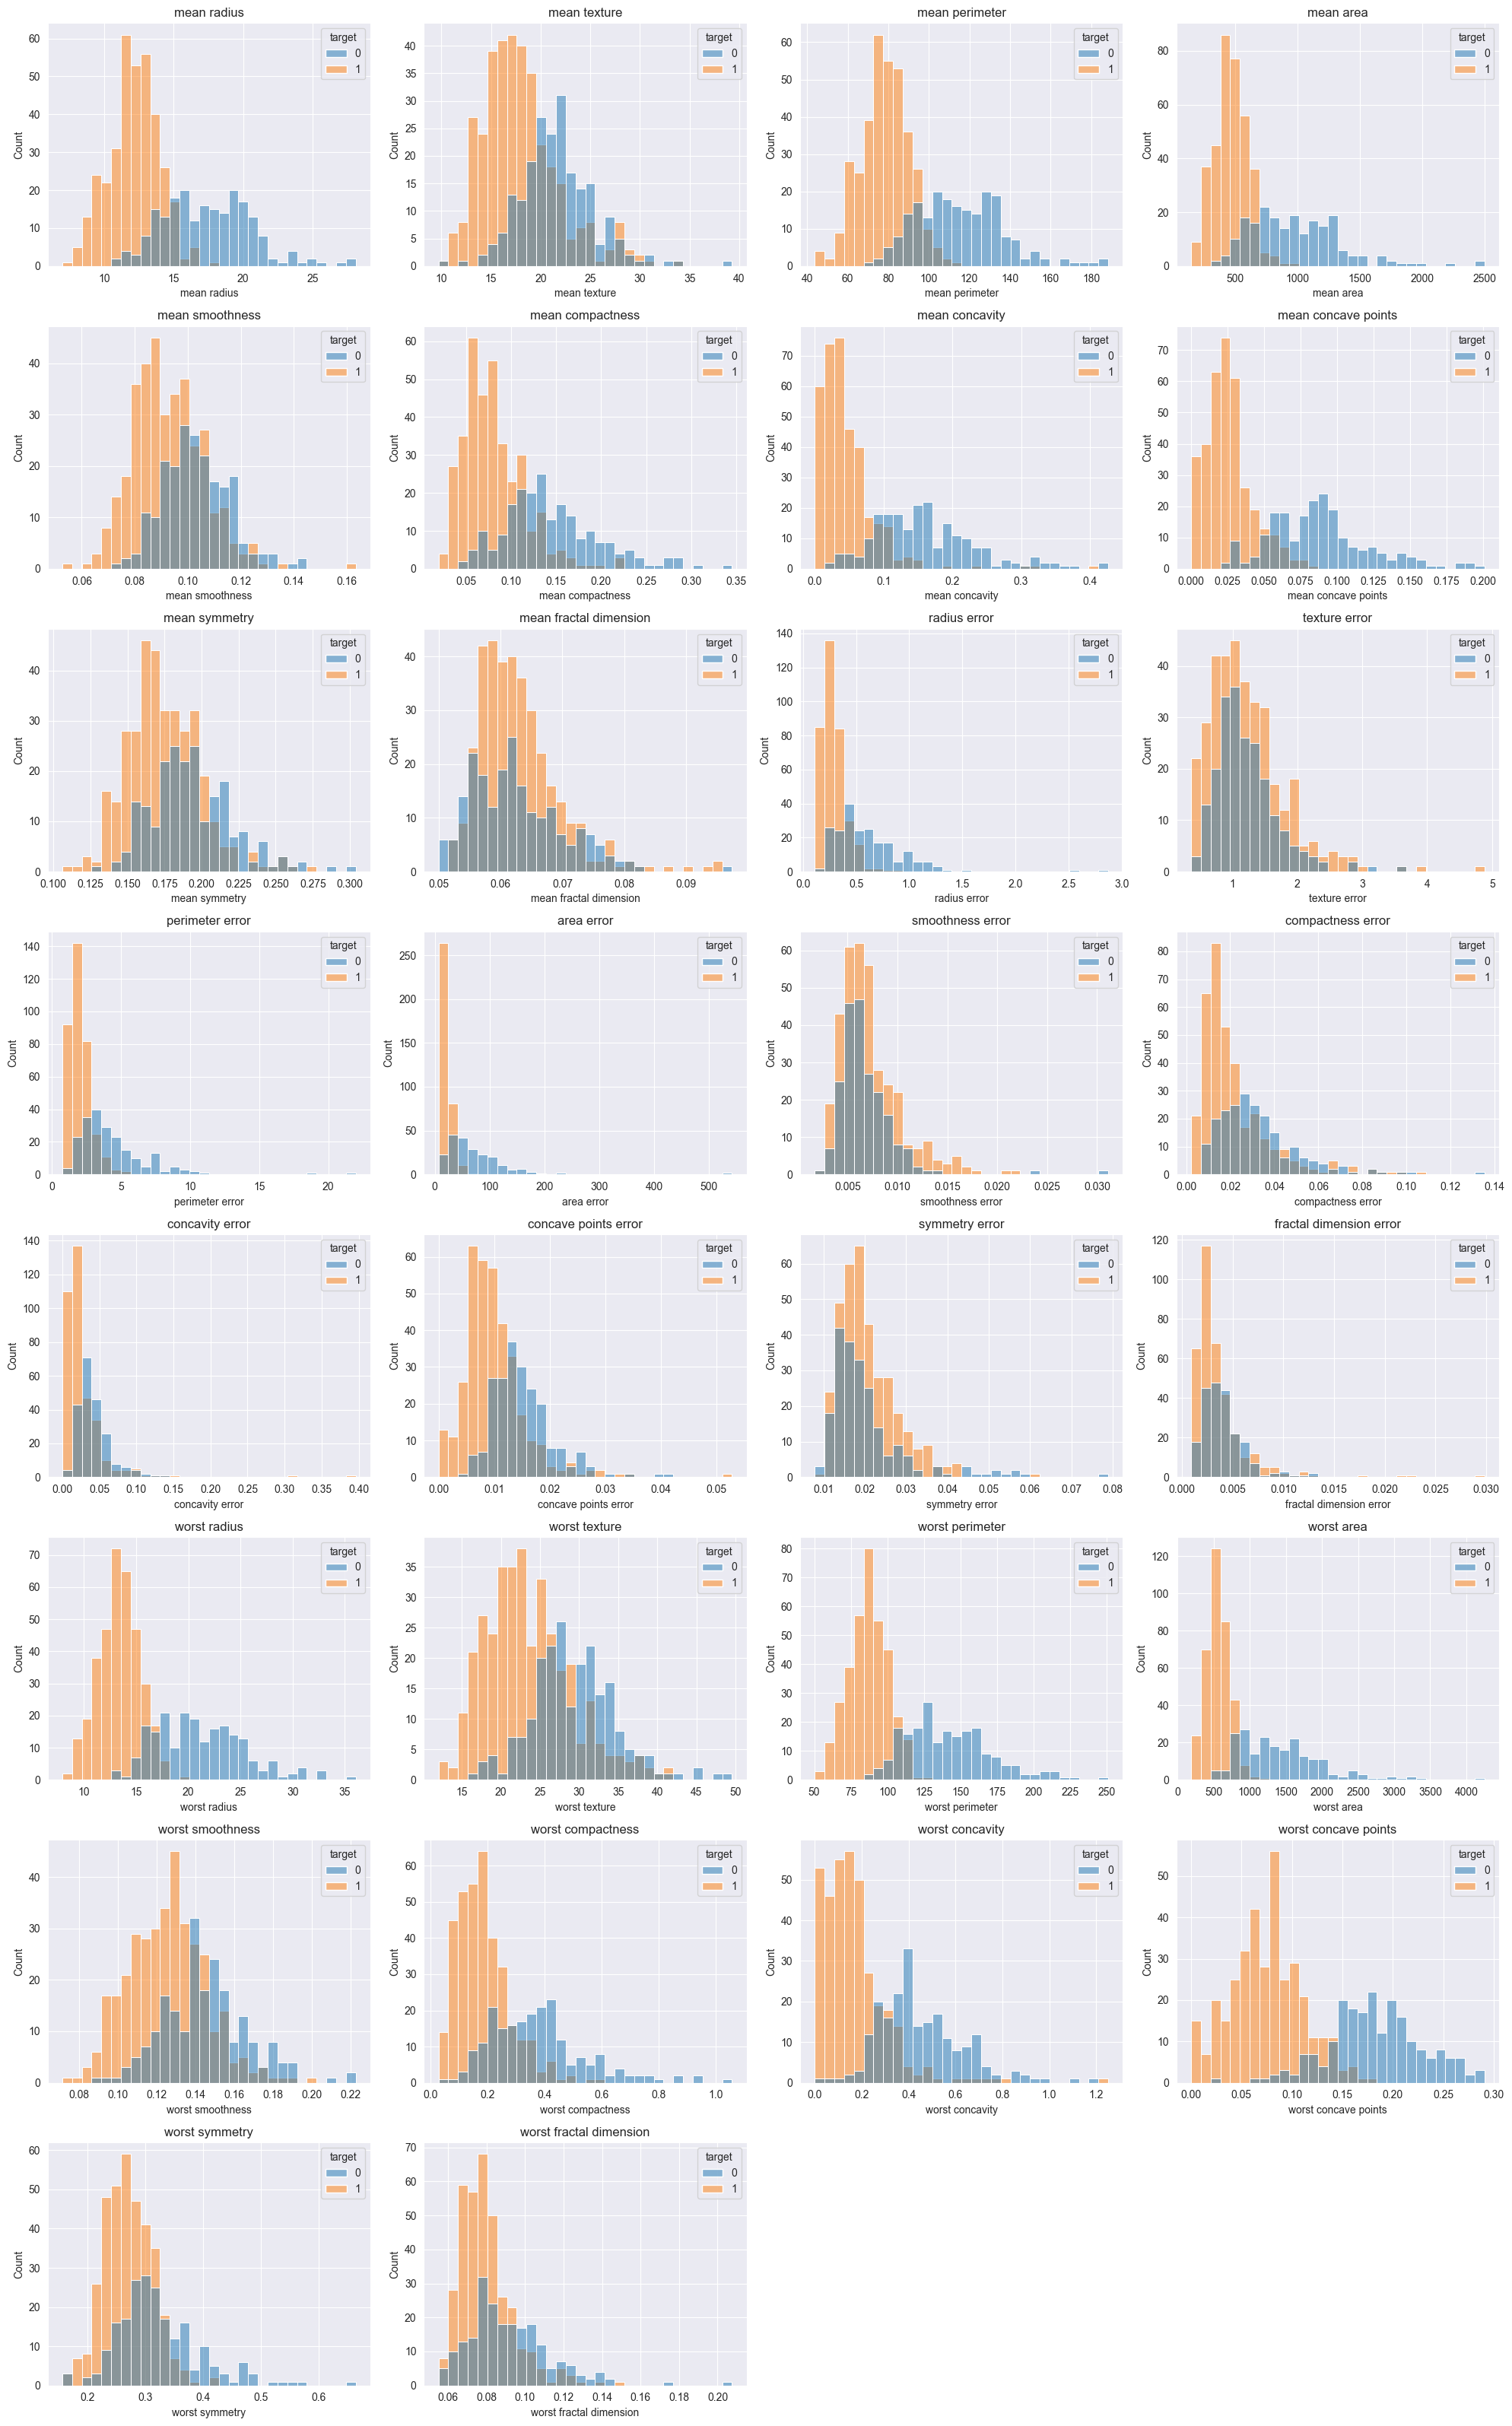

In [7]:
import seaborn as sns


feature_names = cancer_dataset["feature_names"]
# 그래프 크기 설정
num_features = len(feature_names)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols  # 필요한 행 수 계산
plt.figure(figsize=(20, 4 * num_rows))

for idx, feature_name in enumerate(feature_names):
    plt.subplot(num_rows, num_cols, idx + 1)

    sns.histplot(
        data=cancer_df,
        x=feature_name,
        hue="target",
        bins=30,
        alpha=0.5,
    )

    plt.title(feature_name)

plt.tight_layout()
plt.show()
# "mean radius" 나 "mean perimeter" feature 는 두 그룹이 잘 나뉘고 있다!
# 하지만 "mean smoothness" 나 "mean fractal dimension" 은 두 그룹이 거의 겹쳐있다.

## 로지스틱 회귀(Logistic Regression)

### 로지스틱 함수 시각화

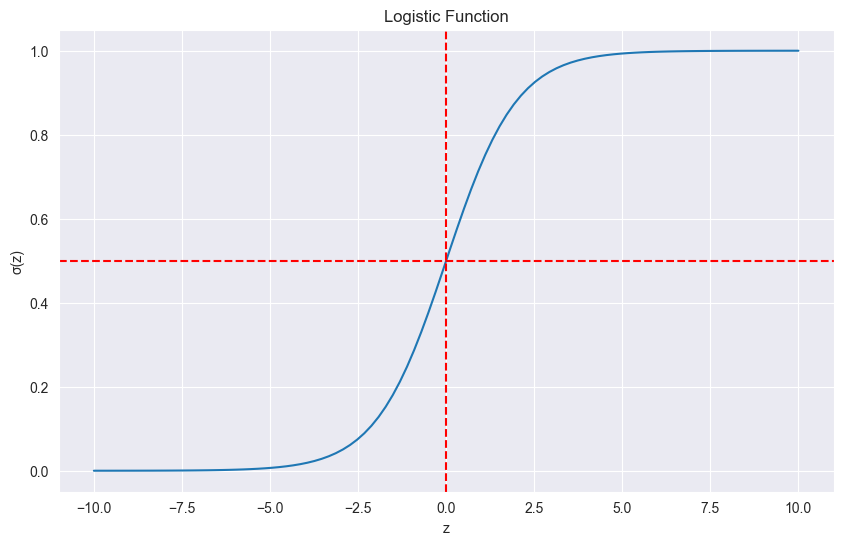

In [8]:
def logistic_function(z):
    return 1 / (1 + np.exp(-z))


z = np.linspace(-10, 10, 100)
y = logistic_function(z)

plt.figure(figsize=(10, 6))
plt.plot(z, y)
plt.grid(True)
plt.title("Logistic Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.axhline(y=0.5, color="r", linestyle="--")
plt.axvline(x=0, color="r", linestyle="--")
plt.show()

### Binary Cross Entropy "실제로" 계산 해보기

In [9]:
def binary_cross_entropy(y, y_pred):
    return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)


ex_bce_df = pd.DataFrame({"BCE(y=0)": [np.nan] * 5, "BCE(y=1)": [np.nan] * 5}, index=[0.01, 0.2, 0.5, 0.9, 0.9999])

ex_bce_df.iloc[:, 0] = binary_cross_entropy(0, ex_bce_df.index)
ex_bce_df.iloc[:, 1] = binary_cross_entropy(1, ex_bce_df.index)
ex_bce_df

,BCE(y=0),BCE(y=1)
0.0100,0.010050,4.605170
0.2000,0.223144,1.609438
0.5000,0.693147,0.693147
0.9000,2.302585,0.105361
0.9999,9.210340,0.000100


## 로지스틱 회귀 모델

### LogisticRegression

`max_iter=숫자` 파라미터

- 사용 예시: `sklearn.linear_model.Logisticregression(max_iter=숫자)`
- 로지스틱 회귀 모델에서 최적화 알고리즘(solver)이 수렴하기 위해 수행할 수 있는 최대 반복 횟수를 의미
    1. 목적: 모델이 최적의 파라미터를 찾기 위한 학습 과정에서 반복할 수 있는 최대 횟수를 지정합니다.
    2. 기본값: scikit-learn의 LogisticRegression에서는 `max_iter`의 기본값이 100입니다.
    3. 필요성
        - 데이터가 복잡하거나 특성(feature)이 많은 경우 기본값인 100회 반복으로는 수렴하지 못할 수 있습니다.
        - 수렴하지 못하면 `ConvergenceWarning` 경고가 발생합니다.

`score()` 함수

- 사용 예시: `sklearn.linear_model.Logisticregression().score(test_x, test_y)`
- 이 점수는 모델이 얼마나 잘 예측하는지를 나타내는 지표입니다.
- 반환값: 정확도(accuracy) - 올바르게 예측된 샘플의 비율 (0.0 ~ 1.0 사이의 값)
    - 계산 방법: 정확하게 예측된 샘플 수 ÷ 전체 샘플 수

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


random_state = 1234

train_x, test_x, train_y, test_y = train_test_split(
    cancer_dataset["data"], cancer_dataset["target"], test_size=0.2, random_state=random_state
)

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(train_x, train_y)

print("로지스틱 회귀 모델의 Score:", logistic_model.score(test_x, test_y))

로지스틱 회귀 모델의 Score: 0.9473684210526315


이 모델을 사용해도 될지 한번 생각해보자

- 이 모델이 판단을 잘못 냈을 경우는 다음과 같이 2가지가 있다.
- case 1) 암이 아닌데(negative), 암이라고 잘못 판단하는 경우; False Positive(위양성)
    - 환자느 불필요한 스트레스와 추가적인 검사를 받게 된다.
- case 2) 암이 있는데(positive), 암이 아니라고 잘못 판단하는 경우; False Negative(위음성)
    - 환자는 필요한 치료를 적절한 시기에 받지 못하게 된다!!!!

=> case 2 인 False Negative 가 훨씬 심각한 결과를 초래
=> 그래서 False Positive 를 좀 많이 내더라도, False Negative 를 줄일 수 있다면 더 유용한 모델이 될 것!

한계값(threshold) 를 조정해서 위음성 줄이기

In [11]:
# 모델에서 결과 확률값을 그대로 가져오기
probs = logistic_model.predict_proba(test_x)[:, 1]
probs

array([9.79799532e-01, 9.99997418e-01, 9.80872092e-01, 9.99855076e-01,
       9.98001808e-01, 9.94440353e-01, 6.56885675e-02, 9.99997171e-01,
       2.98569188e-09, 1.01254994e-06, 6.60211831e-08, 9.60321140e-01,
       9.97829995e-01, 9.27351254e-01, 9.99571473e-01, 2.22944090e-10,
       9.99974240e-01, 9.99975435e-01, 9.99833519e-01, 1.75485225e-05,
       9.97846971e-01, 1.16875609e-02, 6.14088553e-09, 8.27331142e-13,
       6.91260823e-07, 7.59861543e-01, 5.06922846e-03, 9.99698974e-01,
       9.99939537e-01, 9.99585926e-01, 9.94394449e-01, 9.99728815e-01,
       3.03429959e-03, 9.91095164e-01, 9.91640361e-01, 9.73321981e-01,
       9.99860170e-01, 2.94086453e-03, 1.32510313e-01, 9.99962748e-01,
       6.98058248e-05, 9.99163058e-01, 6.25006844e-09, 9.36117360e-01,
       9.53903239e-01, 9.99994648e-01, 9.99815481e-01, 7.53031625e-01,
       4.98023707e-09, 9.24518096e-01, 8.31016284e-01, 9.89019855e-01,
       9.98843633e-01, 3.31895987e-07, 2.02747625e-01, 9.99888589e-01,
      

In [12]:
# 원래 모델의 예측값(확률값이 0.5 이상인 것과 동일)
print("기본 예측값:")
print(logistic_model.predict(test_x))

prediction = probs >= 0.5  # threshold 가 0.5 인 상황(0.5 가 default!)
print("0.5 이상의 확률값을 가지는 예측들:")
print(prediction.astype(int))

기본 예측값:
[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
0.5 이상의 확률값을 가지는 예측들:
[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]


In [13]:
# 실제는 암(class 가 0)이지만, 예측은 암이 아닌 False Negative 개수 구하기
print("암의 개수:", len(test_y) - test_y.sum(), (test_y == 0).sum())
print("예측한 암이 아닌 case 의 개수:", (~prediction).sum())

# 암인데 암이 아니라고 한 것들의 개수
false_negative = ~test_y & prediction  # prediction[test_y == 0]
print("위음성의 개수:", false_negative.sum())

암의 개수: 45 45
예측한 암이 아닌 case 의 개수: 39
위음성의 개수: 6


In [14]:
# threshold 를 0.7 로 바꾸기!
new_prediction = logistic_model.predict_proba(test_x)[:, 1] >= 0.7
false_negative = ~test_y & new_prediction
print("threshold 0.7 일 때, 위음성의 개수:", false_negative.sum())  # 1개가 줄었다!

threshold 0.7 일 때, 위음성의 개수: 5


## 결정 트리(Decision Tree)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
random_state = 1234
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=random_state)
decision_tree.fit(train_x, train_y)

print("train 데이터셋에 대한 분류 정확도:", decision_tree.score(train_x, train_y))
print("test 데이터셋에 대한 분류 정확도:", decision_tree.score(test_x, test_y))

train 데이터셋에 대한 분류 정확도: 1.0
test 데이터셋에 대한 분류 정확도: 0.9035087719298246


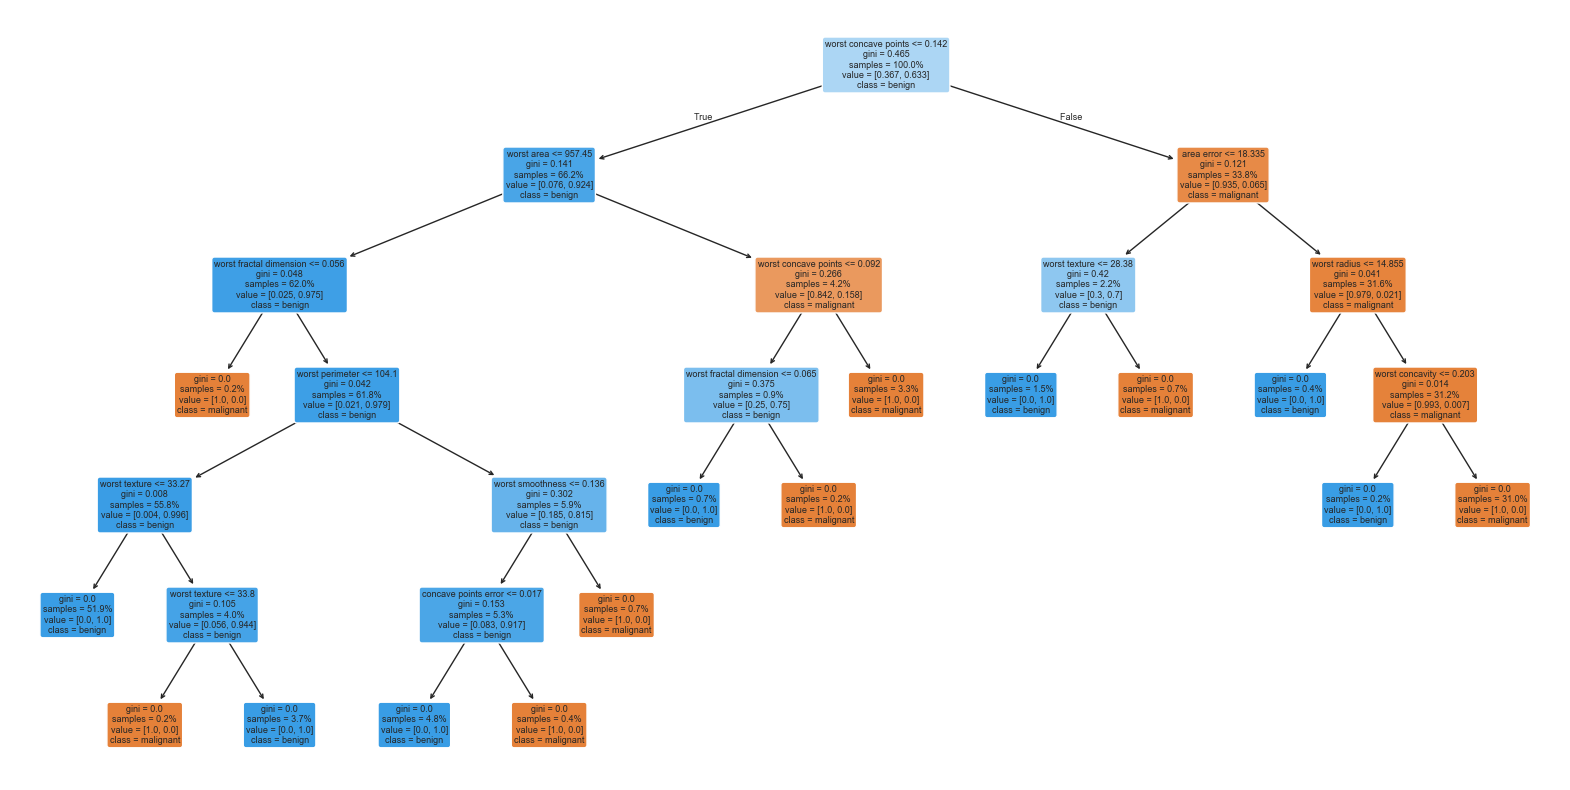

In [17]:
plt.figure(figsize=(20, 10))

plot_tree(
    decision_tree,
    feature_names=cancer_dataset["feature_names"],
    class_names=cancer_dataset["target_names"],
    filled=True,
    rounded=True,
    proportion=True,
    impurity=True,
)

plt.show()

**feature importance**

- 결정 트리에서 각각의 변수가 예측 결과에 얼마나 중요한 역할을 했는지를 나타내는 지표
- 노드에서 해당 변수를 활용해 불순도를 얼마나 감소시켰는지를 나타냄
- 하지만, 이 값이 낮게 나타났다고 해서 그 변수가 전혀 중요치 않다는 결론은 내릴 수 없음
    - 랜덤으로 학습되는 개별 모델에 의존하는 값이므로
    - 다른 모델에서는 여기서 낮게 나온 변수를 중요하게 생각해서 학습할 수도 있으므로!

In [18]:
decision_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04080345, 0.        ,
       0.        , 0.        , 0.01734378, 0.        , 0.        ,
       0.01839585, 0.02928952, 0.00758474, 0.11248202, 0.02119796,
       0.        , 0.00939362, 0.72738542, 0.        , 0.01612362])

**`tree_.feature`**

- 결정트리 모델의 각 노드가 어떤 특성(피처)을 사용하여 분할(split)하는지를 나타내는 배열
- 길이는 트리의 전체 노드 수와 같습니다 (`node_count`).
- 각 요소는 분할에 사용된 특성의 인덱스를 나타낸다.
- 리프 노드(leaf node)의 경우 음수 값을 가진다. (리프 노드는 분할하지 않기 때문)
- 인덱스는 원래 훈련 데이터의 특성 순서를 따른다.
- 예시) 만약 `feature[0] = 3`이라면, 루트 노드는 특성 인덱스 3(4번째 특성)을 사용하여 분할한다는 의미


In [19]:
decision_tree.tree_.feature

array([27, 23, 29, -2, 22, 21, -2, 21, -2, -2, 24, 17, -2, -2, -2, 27, 29,
       -2, -2, -2, 13, 21, -2, -2, 20, -2, 26, -2, -2], dtype=int64)

**`tree_.threshold`**

- 각 노드에서 결정을 내리기 위해 사용하는 임계값(threshold)을 나타내는 배열
- 길이는 트리의 전체 노드 수와 같다.
- 각 내부 노드에 대해, 해당 특성 값이 임계값보다
    - 작거나 같으면(`<=`) 왼쪽 자식 노드로
    - 크면(`>`) 오른쪽 자식 노드로
- 리프 노드의 경우에도 임계값이 있지만 의미가 없다. (관례상 -2로 설정되는 경우가 많음)
- 예시) 만약 `feature[0] = 3`이고 `threshold[0] = 2.5`라면,
    - 루트 노드에서는 "만약 4번째 특성의 값이 2.5 이하이면 왼쪽 자식 노드로,
    - 그렇지 않으면 오른쪽 자식 노드로 이동한다"는 규칙을 적용

In [20]:
decision_tree.tree_.threshold

array([ 1.41700000e-01,  9.57450012e+02,  5.59949987e-02, -2.00000000e+00,
        1.04100002e+02,  3.32699986e+01, -2.00000000e+00,  3.37999992e+01,
       -2.00000000e+00, -2.00000000e+00,  1.36000000e-01,  1.69200003e-02,
       -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,  9.15200002e-02,
        6.49200007e-02, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        1.83350000e+01,  2.83800001e+01, -2.00000000e+00, -2.00000000e+00,
        1.48550000e+01, -2.00000000e+00,  2.03400001e-01, -2.00000000e+00,
       -2.00000000e+00])

## 랜덤 포레스트(Random Forest)

In [21]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(random_state=random_state)
random_forest.fit(train_x, train_y)

print("train 데이터셋에 대한 분류 정확도:", random_forest.score(train_x, train_y))
print("test 데이터셋에 대한 분류 정확도:", random_forest.score(test_x, test_y))

train 데이터셋에 대한 분류 정확도: 1.0
test 데이터셋에 대한 분류 정확도: 0.9298245614035088


### 하이퍼파라미터 튜닝 옅보기

In [22]:
from sklearn.model_selection import GridSearchCV


# 하이퍼파라미터 그리드 정의
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=random_state), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

# 훈련 데이터로 그리드 서치 수행
grid_search.fit(train_x, train_y)

# 최적의 파라미터와 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최적의 교차 검증 점수:", grid_search.best_score_)

# 최적의 모델로 테스트 세트 평가
best_rf_model = grid_search.best_estimator_
print("최적화된 랜덤 포레스트의 테스트 정확도:", best_rf_model.score(test_x, test_y))

최적의 파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
최적의 교차 검증 점수: 0.9670329670329669
최적화된 랜덤 포레스트의 테스트 정확도: 0.9210526315789473


## 서포트 벡터 머신(SVM, Support Vector Machine)

### 데이터셋 만들기

`sklearn.datasets.make_blogs(...)`
- 매개변수
    - `n_samples`: 생성할 샘플(데이터 포인트)의 총 개수 (기본값: 100)
    - `n_features`: 각 샘플의 특성(feature) 수 (기본값: 2)
    - `centers`: 클러스터의 중심 수 또는 중심 위치를 지정하는 배열 (기본값: 3)
    - `cluster_std`: 클러스터의 표준 편차 (기본값: 1.0)
    - `center_box`: 클러스터 중심이 위치할 박스 경계 (기본값: (-10.0, 10.0))
    - `shuffle`: 생성된 샘플을 섞을지 여부 (기본값: True)
    - `random_state`: 난수 생성을 위한 시드 값, 재현 가능한 결과를 위해 설정
- 함수는 두 가지 값을 반환
    - `X`: 생성된 샘플의 특성 행렬 (shape: n_samples, n_features)
    - `y`: 생성된 샘플의 클러스터 레이블 (shape: n_samples)


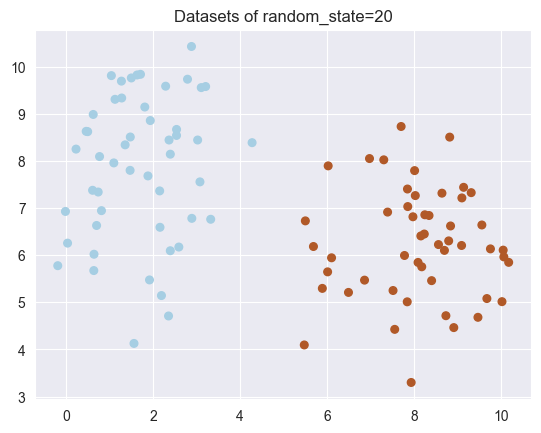

In [23]:
from sklearn.datasets import make_blobs


random_state = 20

X, y = make_blobs(
    n_samples=100,  # 샘플 개수
    centers=2,  # 클러스터의 수(여기서는 이진 분류를 할 것이므로 2개)
    cluster_std=1.2,  # 샘플들의 표준편차
    random_state=random_state,
)

# 만든 데이터셋(합성 데이터)를 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.title("Datasets of random_state=20")
plt.show()

### 기본적인 SVM 으로 분류 해보기

**`sklearn.svm.SVC`**

주요 매개변수
1. `C` (float, 기본값=1.0)
    - 오류 항의 페널티 매개변수
    - 값이 작을수록 마진을 더 넓게 잡고, 값이 클수록 모든 샘플을 올바르게 분류하는데 초점을 둔다.
2. `kernel` (string, 기본값="rbf")
    - 커널 유형을 지정한다.
    - 옵션: "linear", "poly", "rbf", "sigmoid", "precomputed"
3. `degree` (int, 기본값=3)
    - "poly" 커널 함수의 차수
4. `gamma` (float, 기본값="scale")
    - "rbf", "poly", "sigmoid" 커널 함수의 계수
    - "scale"(기본값)은 1/(n_features * X.var())를 사용
    - "auto"는 1/n_features를 사용
5. `coef0` (float, 기본값=0.0)
    - "poly", "sigmoid" 커널 함수의 독립항
6. `probability` (bool, 기본값=False)
    - 확률 추정 활성화 여부
7. `shrinking` (bool, 기본값=True)
    - 축소 휴리스틱 사용 여부
8. `tol` (float, 기본값=1e-3)
    - 종료 조건의 허용 오차
9. `class_weight` (dict 또는 "balanced", 기본값=None)
    - 클래스 가중치를 지정
10. `max_iter` (int, 기본값=-1)
    - 반복 횟수 제한. -1은 제한 없음을 의미

In [24]:
from sklearn.svm import SVC


svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X, y)
svm_classifier

SVC(kernel='linear')

학습된 결정 경계를 시각화 해보기

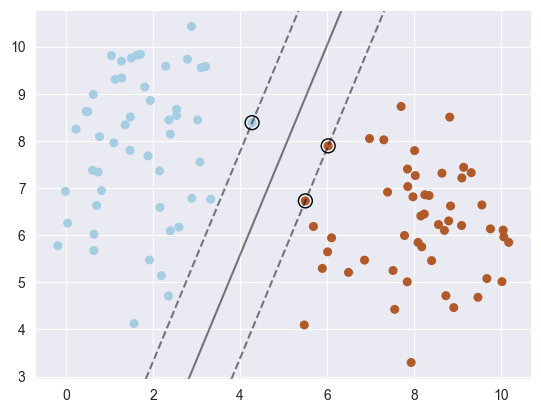

In [25]:
def make_xy_grid(xlim, ylim, n_points):
    #   1. x, y 각각이 일정 간격으로 변화하는 grid를 생성
    xx = np.linspace(*xlim, n_points)
    yy = np.linspace(*ylim, n_points)
    YY, XX = np.meshgrid(yy, xx)

    #   2. grid 위의 900개 점 좌표들을 순서대로 나타낸 array
    xy = np.stack([XX.reshape(-1), YY.reshape(-1)], axis=1)  # shape: (n^2, 2)
    return XX, YY, xy


plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
XX, YY, xy = make_xy_grid(ax.get_xlim(), ax.get_ylim(), 30)

# 모델의 결정 경계
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진 시각화
ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

# 서포트 벡터 표시
ax.scatter(
    svm_classifier.support_vectors_[:, 0],
    svm_classifier.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### 커널트릭(Kernel Trick) 을 이용해서 분류 해보기

**RBF(Radial Basis Function) 커널이란?**

- RBF 커널은 비선형적으로 분리된 데이터를 분류하기 위해 사용되는 강력한 방법이다.
- 이 커널은 데이터를 더 높은 차원의 공간으로 변환하여 선형적으로 분리할 수 없는 데이터를 분류할 수 있게 해준다.

- 비유: 산과 골짜기가 있는 지형
    - RBF 커널을 이해하는 좋은 방법은 지형 모델링으로 생각하는 것이다.
    1. 지형 비유: 여러분의 데이터 포인트들이 평평한 땅(2D 공간) 위에 있다고 상상해보자.
        - 각 데이터 포인트는 이 평평한 땅에 꽂힌 핀이라고 생각하자.
        - RBF 커널은 각 핀 위치에 종모양의 산(가우시안 산)을 만든다.
        - 같은 클래스의 데이터 포인트들은 서로 가까이 있어서 그들의 산들이 합쳐져 더 큰 산맥을 형성한다.
        - 다른 클래스의 포인트들은 산맥들 사이의 골짜기로 분리된다.

    2. 거리 기반 유사도: RBF 커널은 두 데이터 포인트 간의 거리를 기반으로 유사도를 측정한다.
        - 가까운 포인트들은 높은 유사도(1에 가까운 값)를 가진다.
        - 먼 포인트들은 낮은 유사도(0에 가까운 값)를 가진다.

- RBF 커널 함수의 수식은 다음과 같다.

$$ K(x, y) = e^{-\gamma \times ||x - y||^2} $$

- `x`와 `y`는 두 개의 데이터 포인트
- `||x - y||²`은 두 점 사이의 유클리드 거리의 제곱
- `γ`(감마)는 가우시안 커널의 폭을 결정하는 하이퍼파라미터

- 예시
    1. 꽃 분류 문제: 꽃의 꽃잎 길이와 너비만으로 꽃 종류를 구분하는 상황을 생각해보자
        - 2D 공간(꽃잎 길이, 꽃잎 너비)에서 여러 종류의 꽃들이 섞여 있다.
        - 단순한 직선으로는 이 꽃들을 정확히 분류할 수 없다.
        - RBF 커널은 이 2D 공간을 더 높은 차원으로 변환해서 꽃들을 분류한다.
        - 마치 각 꽃의 위치 위에 종 모양의 산을 세우고,
        - 같은 종류의 꽃들은 하나의 산맥으로 연결되어 다른 종류와 분리되게 한다.

    2. 공원에서의 그룹 인식: 공원에 여러 그룹의 사람들이 있다고 생각해보자.
        - 같은 그룹에 속한 사람들은 서로 가깝게 모여 있다.
        - RBF 커널은 각 사람 주변에 "영향력 구름"을 만들어낸다.
        - 가까이 있는 사람들의 "영향력 구름"은 서로 겹쳐져서 하나의 큰 구름을 형성한다.
        - 이렇게 형성된 구름들의 경계선에 따라 그룹을 구분할 수 있게 된다.

- RBF 커널의 특징
    1. **지역적 영향력**
        - 각 데이터 포인트의 영향은 주변에 국한된다.
        - 멀리 있는 데이터 포인트에는 거의 영향을 미치지 않는다.
    2. **감마(γ) 파라미터의 역할**
        - 큰 감마 값: 좁은 산 형태, 각 데이터 포인트의 영향 범위가 좁아져 더 복잡한 결정 경계를 만든다(과적합 가능성).
        - 작은 감마 값: 넓은 산 형태, 각 데이터 포인트의 영향 범위가 넓어져 더 부드러운 결정 경계를 만든다.
    3. **C 파라미터**
        - C 는 오분류를 얼마나 허용할지 결정
        - 큰 C 값: 오분류에 대해 높은 페널티, 더 복잡한 결정 경계를 만든다.
        - 작은 C 값: 오분류를 더 많이 허용, 더 부드러운 결정 경계를 만든다.

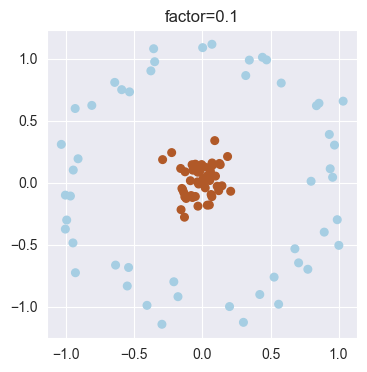

In [26]:
from sklearn.datasets import make_circles


# 데이터 생성
X, y = make_circles(factor=0.1, noise=0.1)  # factor: 생성할 원의 반지름 비율

# 생성한 데이터를 시각화
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.title("factor=0.1")
plt.show()

- RBF 가 적용되었을 때, 데이터의 변화 시각화

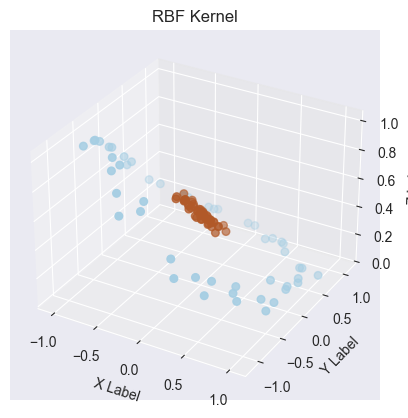

<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.gaussian_process.kernels import RBF


# RBF 커널함수 적용
z = RBF(1.0).__call__(X)[0]

# 3D 공간에 커널함수 적용된 데이터셋을 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:, 0], X[:, 1], z, c=y, s=30, cmap=plt.cm.Paired)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

plt.title("RBF Kernel")
plt.show()
plt.clf()

- 커널 트릭을 적용한 SVM 학습

In [28]:
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X, y)
svm_classifier

SVC()

학습된 결정 경계 시각화해보기

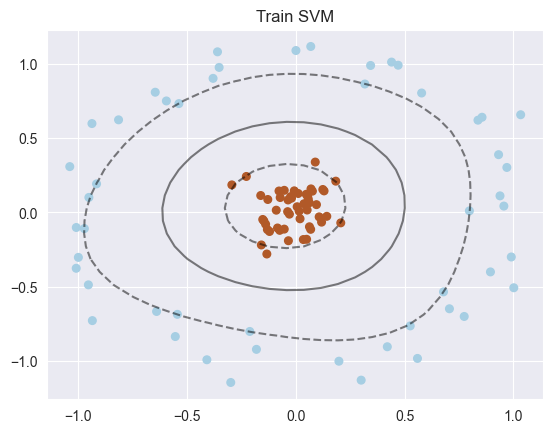

In [29]:
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 결정경계 시각화
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_svc_decision_function(svm_classifier)
plt.title("Train SVM")
plt.show()